In [1]:
# If additional packages need to be used, uncomment the last two lines of this cell and replace <package list> with 
# a list of additional packages.
# This will ensure the notebook has all the dependencies satisfied and works everywhere.

#import sys
#!{sys.executable} -m pip install <package list>

### Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings

pd.set_option('display.float_format', lambda num:'%1.3f'%num)
pd.set_option('display.max_columns', 99)
filterwarnings('ignore')

# Data Description

Feature | Description
:---|:---
UniqueId |The unique id of an invoice.
Region |The geographical region of the customer.
OrderDate| The date on which order was placed. (YYYY-MM-DD)
InvoiceDate| The date on which the invoice was generated. (YYYY-MM-DD)
Amount| The amount of the invoice. (in US $)
DueDate| Due date by which payment should have been received. (YYY-MM-DD)
Dispute| Whether the customer has accepted or not the invoice amount. True indicates the invoice is disputed and False indicates the invoice is agreed to.
InvoiceType| The invoice can be of two types, ‘electronic’ or ‘paper’.
Delay|This is the response variable. True to indicate that the payment deadline was violated and False to indicate on-time clearance.


# Data Wrangling & Visualization 




In [51]:
df_train = pd.read_csv("train.csv", index_col=0)

In [52]:
df_train.head()

,Region,OrderDate,InvoiceDate,DueDate,Amount,Disputed,InvoiceType,Delay
UniqueId,,,,,,,,
5133177585,North America,2011-11-06,2012-01-03,2012-02-06,55.370,No,Paper,True
280670965,South America,2011-11-17,2012-01-03,2012-02-15,50.390,No,Paper,False
6393629835,Europe,2011-11-28,2012-01-03,2012-02-15,71.330,No,Paper,False
5928070131,Africa&Asia,2011-11-01,2012-01-03,2012-01-22,97.600,No,Paper,True
6050714721,Africa&Asia,2011-11-08,2012-01-03,2012-02-15,15.990,Yes,Paper,True


In [53]:
#Explore columns
df_train.columns

Index(['Region', 'OrderDate', 'InvoiceDate', 'DueDate', 'Amount', 'Disputed',
       'InvoiceType', 'Delay'],
      dtype='object')

In [54]:
# Pre processing section: remove the null values

null_vals = df_train.isnull().sum().to_frame(name = 'NULL_COUNTS')
null_vals = null_vals[null_vals['NULL_COUNTS']>0]
null_features = null_vals.index
null_vals

,NULL_COUNTS
Region,27
Amount,8
Disputed,27
InvoiceType,8


In [55]:
# Pre processing section: replacing the missing values with mode of each column

train=df_train.copy()   # make a deep copy which will not reflect in the original arrray

ll=train.columns.tolist()  # store the name of the column
for i in range(len(ll)):
    num = train[ll[i]].mode()[0]
    train[ll[i]].fillna(num, inplace=True)

In [56]:
#Description: this statistics will give us a quick way to find the outliers
train.describe()

,Amount
count,1850.000
mean,59.442
std,21.448
min,-97.330
25%,46.242
50%,60.235
75%,73.705
max,128.280


In [57]:
# investigate the missing values left
null_vals = train.isnull().sum().to_frame(name = 'NULL_COUNTS')
null_vals = null_vals[null_vals['NULL_COUNTS']>0]
null_features = null_vals.index
null_vals

,NULL_COUNTS


In [59]:
#Defining the season for north hemisphere

def find_season(month):
    if month <=3:
        return 1
    elif month >3 and month <=6:
        return 2
    elif month >7 and month <=9:
        return 3
    else:
        return 4

In [60]:
# find the day, week, month, season, and year for Duedate, but day, week, and season, and month for the rest and finally the differnce between DueDate and the rest of date

from datetime import datetime
import datetime


OrderDate=np.c_[train['OrderDate']]
InvoiceDate=np.c_[train['InvoiceDate']]
DueDate=np.c_[train['DueDate']]

# generate InvoiceDate data

invoiceD= np.empty([len(InvoiceDate), 1],dtype=np.int32)
invoiceM= np.empty([len(InvoiceDate), 1],dtype=np.int32)
invoiceW= np.empty([len(InvoiceDate), 1],dtype=np.int32)
invoiceS= np.empty([len(InvoiceDate), 1],dtype=np.int32)


for i in range (0, len(InvoiceDate)):
    dd=InvoiceDate[i,0]
    my_list = dd.split('-')
    invoiceD[i,0]=int(my_list[2])
    invoiceM[i,0]=int(my_list[1])
    invoiceW[i,0]=int(datetime.date(int(my_list[0]),int(my_list[1]),int(my_list[2])).strftime("%V"))
    invoiceS[i,0]=find_season(int(my_list[1]))

# generate OrderDate data

orderDateD= np.empty([len(OrderDate), 1],dtype=np.int32)
orderDateM= np.empty([len(OrderDate), 1],dtype=np.int32)
orderDateW= np.empty([len(OrderDate), 1],dtype=np.int32)
orderDateS= np.empty([len(OrderDate), 1],dtype=np.int32)

for i in range (0, len(OrderDate)):
    dd=OrderDate[i,0]
    my_list = dd.split('-')
    orderDateD[i,0]=int(my_list[2])
    orderDateM[i,0]=int(my_list[1])
    orderDateW[i,0]=int(datetime.date(int(my_list[0]),int(my_list[1]),int(my_list[2])).strftime("%V"))
    orderDateS[i,0]=find_season(int(my_list[1]))


# generate DueDate data

dueDateD= np.empty([len(DueDate), 1],dtype=np.int32)
dueDateM= np.empty([len(DueDate), 1],dtype=np.int32)
dueDateY= np.empty([len(DueDate), 1],dtype=np.int32)
dueDateW= np.empty([len(DueDate), 1],dtype=np.int32)
dueDateS= np.empty([len(DueDate), 1],dtype=np.int32)

for i in range (0, len(DueDate)):
    dd=DueDate[i,0]
    my_list = dd.split('-')
    dueDateD[i,0]=int(my_list[2])
    dueDateM[i,0]=int(my_list[1])
    dueDateY[i,0]=int(my_list[0])
    dueDateW[i,0]=int(datetime.date(int(my_list[0]),int(my_list[1]),int(my_list[2])).strftime("%V"))
    dueDateS[i,0]=find_season(int(my_list[1]))


# generate the difference between two dates

due_invoice= np.empty([len(InvoiceDate), 1],dtype=np.int32)
due_order= np.empty([len(InvoiceDate), 1],dtype=np.int32)
invoice_order= np.empty([len(InvoiceDate), 1],dtype=np.int32)

for i in range (0, len(DueDate)):

    s=DueDate[i,0]
    ss=OrderDate[i,0]
    sss=InvoiceDate[i,0]


    from datetime import datetime
    dt = datetime.strptime(s, '%Y-%m-%d').date() 
    dto = datetime.strptime(ss, '%Y-%m-%d').date()
    dtoo = datetime.strptime(sss, '%Y-%m-%d').date()
    h1=dt-dtoo   # difference between DueDate and OrderDate
    h2=dt-dto    # difference between DueDate and OrderDate
    h3=dtoo-dto  # difference between InvoiceDate and OrderDate
    due_invoice[i,0]=int(h1.days)
    due_order[i,0]=int(h2.days)
    invoice_order[i,0]=int(h3.days)

In [61]:
# Calculate various statistical features and parameters of day, month, week, and season of for each client 

#!pip install statsmodels 
from numpy import var
from numpy import std
from numpy import cov
from statistics import median
from statistics import mean
from scipy.stats import gmean
from statsmodels.tsa.ar_model import AutoReg

DATA1=np.array([])
DATA2=np.array([])
DATA3=np.array([])
DATA4=np.array([])
DATA5=np.array([])
DATA6=np.array([])
DATA7=np.array([])
DATA8=np.array([])
DATA9=np.array([])
DATA10=np.array([])
DATA11=np.array([])
DATA12=np.array([])
DATA13=np.array([])
DATA14=np.array([])
DATA15=np.array([])
DATA16=np.array([])
DATA17=np.array([])
DATA18=np.array([])
DATA19=np.array([])
DATA20=np.array([])
DATA21=np.array([])
DATA22=np.array([])
DATA23=np.array([])
DATA24=np.array([])


for i in range (0,len(InvoiceDate)):
    DATA1=np.append(DATA1,median([orderDateD[i,0],orderDateM[i,0],orderDateW[i,0],orderDateS[i,0]]))
    DATA2=np.append(DATA2,mean([orderDateD[i,0],orderDateM[i,0],orderDateW[i,0],orderDateS[i,0]]))
    DATA3=np.append(DATA3,gmean([orderDateD[i,0],orderDateM[i,0],orderDateW[i,0],orderDateS[i,0]]))
    DATA4=np.append(DATA4,var([orderDateD[i,0],orderDateM[i,0],orderDateW[i,0],orderDateS[i,0]]))
    DATA5=np.append(DATA5,std([orderDateD[i,0],orderDateM[i,0],orderDateW[i,0],orderDateS[i,0]]))
    DATA6=np.append(DATA6,cov([orderDateD[i,0],orderDateM[i,0],orderDateW[i,0],orderDateS[i,0]]))
    model=AutoReg([orderDateD[i,0],orderDateM[i,0],orderDateW[i,0],orderDateS[i,0]],lags=1)
    model_fit = model.fit()
    DATA7=np.append(DATA7,model_fit.params[0])
    DATA8=np.append(DATA8,model_fit.params[1])

    DATA9=np.append(DATA9,median([invoiceD[i,0],invoiceM[i,0],invoiceW[i,0],invoiceS[i,0]]))
    DATA10=np.append(DATA10,mean([invoiceD[i,0],invoiceM[i,0],invoiceW[i,0],invoiceS[i,0]]))
    DATA11=np.append(DATA11,gmean([invoiceD[i,0],invoiceM[i,0],invoiceW[i,0],invoiceS[i,0]]))
    DATA12=np.append(DATA12,var([invoiceD[i,0],invoiceM[i,0],invoiceW[i,0],invoiceS[i,0]]))
    DATA13=np.append(DATA13,std([invoiceD[i,0],invoiceM[i,0],invoiceW[i,0],invoiceS[i,0]]))
    DATA14=np.append(DATA14,cov([invoiceD[i,0],invoiceM[i,0],invoiceW[i,0],invoiceS[i,0]]))
    model=AutoReg([invoiceD[i,0],invoiceM[i,0],invoiceW[i,0],invoiceS[i,0]],lags=1)
    model_fit = model.fit()
    DATA15=np.append(DATA15,model_fit.params[0])
    DATA16=np.append(DATA16,model_fit.params[1])

    DATA17=np.append(DATA17,median([dueDateD[i,0],dueDateM[i,0],dueDateW[i,0],dueDateS[i,0]]))
    DATA18=np.append(DATA18,mean([dueDateD[i,0],dueDateM[i,0],dueDateW[i,0],dueDateS[i,0]]))
    DATA19=np.append(DATA19,gmean([dueDateD[i,0],dueDateM[i,0],dueDateW[i,0],dueDateS[i,0]]))
    DATA20=np.append(DATA20,var([dueDateD[i,0],dueDateM[i,0],dueDateW[i,0],dueDateS[i,0]]))
    DATA21=np.append(DATA21,std([dueDateD[i,0],dueDateM[i,0],dueDateW[i,0],dueDateS[i,0]]))
    DATA22=np.append(DATA22,cov([dueDateD[i,0],dueDateM[i,0],dueDateW[i,0],dueDateS[i,0]]))
    model=AutoReg([dueDateD[i,0],dueDateM[i,0],dueDateW[i,0],dueDateS[i,0]],lags=1)
    model_fit = model.fit()
    DATA23=np.append(DATA23,model_fit.params[0])
    DATA24=np.append(DATA24,model_fit.params[1])


In [62]:
# First drop all date related data and the UniqueId from train set and then concatinate the processed data to the rest of train set


train_N=train.drop(columns=['OrderDate','InvoiceDate','DueDate'])  # drop all date related data and the UniqueId from train set 
train_N['Region'].replace(['North America', 'South  America',  'Europe', 'Africa&Asia','South America','Central America','Africa&psia','SouthCUmeVica'], [0, 1, 2, 3,4,5,6,7], inplace=True)  #create dummy variables for region 
train_N=pd.get_dummies(train_N, columns=['Disputed','InvoiceType', 'Delay'], drop_first=True)  # generate dummies for the rest of categorical variables

Y_train=np.c_[train_N['Delay_True']]   # create the target for training and convert it to numpy array

X_train2=np.column_stack((orderDateD,orderDateM,orderDateW,orderDateS,invoiceD,invoiceM,invoiceW,invoiceS,dueDateD,dueDateM,dueDateW,dueDateS,dueDateY,due_invoice,due_order,invoice_order)) # concatinate part of the date features
X_train3=np.column_stack((DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,DATA8,DATA9,DATA10,DATA11,DATA12,DATA13,DATA14,DATA15,DATA16,DATA17,DATA18,DATA19,DATA20,DATA21,DATA22,DATA23,DATA24))   # concatinate the statistical features

X_train1=train_N.drop(columns=['Delay_True'])  # drop the target from train set  
X_train4=X_train1.to_numpy()
X_train=np.column_stack((X_train4, X_train2,X_train3))                        #generate the train set feature

Generate a test set

In [63]:
# load and prepare the test set and do the same procedure to generate features what has been done for train set

df_test = pd.read_csv("test.csv", index_col=0)

df_test.head()

,Region,OrderDate,InvoiceDate,DueDate,Amount,Disputed,InvoiceType
UniqueId,,,,,,,
5420077969,South America,2013-03-15,2013-06-05,2013-07-18,34.360,No,Electronic
1020758229,Europe,2013-04-11,2013-06-06,2013-07-19,67.190,No,Electronic
6687811896,South America,2013-03-27,2013-06-06,2013-06-29,63.740,No,Electronic
8365605418,Europe,2013-04-27,2013-06-06,2013-07-19,65.160,No,Electronic
8019405718,North America,2013-04-08,2013-06-06,2013-07-13,47.990,Yes,Paper


In [64]:
test=df_test.copy()   # make a deep copy which will not reflect in the original arrray

ll=test.columns.tolist()  # store the name of the column
for i in range(len(ll)):
    num = test[ll[i]].mode()[0]
    test[ll[i]].fillna(num, inplace=True)

In [65]:
test.describe()

,Amount
count,616.000
mean,59.490
std,20.314
min,7.390
25%,45.418
50%,60.515
75%,72.892
max,116.660


In [66]:
# Pre processing section: remove the null values

null_vals = test.isnull().sum().to_frame(name = 'NULL_COUNTS')
null_vals = null_vals[null_vals['NULL_COUNTS']>0]
null_features = null_vals.index
null_vals

,NULL_COUNTS


In [67]:
# For test set :find the day, week, month, season, and year for Duedate, but day, week, and season, and month for the rest and finally the differnce between DueDate and the rest of date

from datetime import datetime
import datetime


OrderDate=np.c_[test['OrderDate']]
InvoiceDate=np.c_[test['InvoiceDate']]
DueDate=np.c_[test['DueDate']]

# generate InvoiceDate data

invoiceD= np.empty([len(InvoiceDate), 1],dtype=np.int32)
invoiceM= np.empty([len(InvoiceDate), 1],dtype=np.int32)
invoiceW= np.empty([len(InvoiceDate), 1],dtype=np.int32)
invoiceS= np.empty([len(InvoiceDate), 1],dtype=np.int32)


for i in range (0, len(InvoiceDate)):
    dd=InvoiceDate[i,0]
    my_list = dd.split('-')
    invoiceD[i,0]=int(my_list[2])
    invoiceM[i,0]=int(my_list[1])
    invoiceW[i,0]=int(datetime.date(int(my_list[0]),int(my_list[1]),int(my_list[2])).strftime("%V"))
    invoiceS[i,0]=find_season(int(my_list[1]))

# generate OrderDate data

orderDateD= np.empty([len(OrderDate), 1],dtype=np.int32)
orderDateM= np.empty([len(OrderDate), 1],dtype=np.int32)
orderDateW= np.empty([len(OrderDate), 1],dtype=np.int32)
orderDateS= np.empty([len(OrderDate), 1],dtype=np.int32)

for i in range (0, len(OrderDate)):
    dd=OrderDate[i,0]
    my_list = dd.split('-')
    orderDateD[i,0]=int(my_list[2])
    orderDateM[i,0]=int(my_list[1])
    orderDateW[i,0]=int(datetime.date(int(my_list[0]),int(my_list[1]),int(my_list[2])).strftime("%V"))
    orderDateS[i,0]=find_season(int(my_list[1]))


# generate DueDate data

dueDateD= np.empty([len(DueDate), 1],dtype=np.int32)
dueDateM= np.empty([len(DueDate), 1],dtype=np.int32)
dueDateY= np.empty([len(DueDate), 1],dtype=np.int32)
dueDateW= np.empty([len(DueDate), 1],dtype=np.int32)
dueDateS= np.empty([len(DueDate), 1],dtype=np.int32)

for i in range (0, len(DueDate)):
    dd=DueDate[i,0]
    my_list = dd.split('-')
    dueDateD[i,0]=int(my_list[2])
    dueDateM[i,0]=int(my_list[1])
    dueDateY[i,0]=int(my_list[0])
    dueDateW[i,0]=int(datetime.date(int(my_list[0]),int(my_list[1]),int(my_list[2])).strftime("%V"))
    dueDateS[i,0]=find_season(int(my_list[1]))


# generate the difference between two dates

due_invoice= np.empty([len(InvoiceDate), 1],dtype=np.int32)
due_order= np.empty([len(InvoiceDate), 1],dtype=np.int32)
invoice_order= np.empty([len(InvoiceDate), 1],dtype=np.int32)

for i in range (0, len(DueDate)):

    s=DueDate[i,0]
    ss=OrderDate[i,0]
    sss=InvoiceDate[i,0]


    from datetime import datetime
    dt = datetime.strptime(s, '%Y-%m-%d').date() 
    dto = datetime.strptime(ss, '%Y-%m-%d').date()
    dtoo = datetime.strptime(sss, '%Y-%m-%d').date()
    h1=dt-dtoo   # difference between DueDate and OrderDate
    h2=dt-dto    # difference between DueDate and OrderDate
    h3=dtoo-dto  # difference between InvoiceDate and OrderDate
    due_invoice[i,0]=int(h1.days)
    due_order[i,0]=int(h2.days)
    invoice_order[i,0]=int(h3.days)

In [68]:
# For test set: Calculate various statistical features and parameters of day, month, week, and season for each client 


DATA1=np.array([])
DATA2=np.array([])
DATA3=np.array([])
DATA4=np.array([])
DATA5=np.array([])
DATA6=np.array([])
DATA7=np.array([])
DATA8=np.array([])
DATA9=np.array([])
DATA10=np.array([])
DATA11=np.array([])
DATA12=np.array([])
DATA13=np.array([])
DATA14=np.array([])
DATA15=np.array([])
DATA16=np.array([])
DATA17=np.array([])
DATA18=np.array([])
DATA19=np.array([])
DATA20=np.array([])
DATA21=np.array([])
DATA22=np.array([])
DATA23=np.array([])
DATA24=np.array([])


for i in range (0,len(InvoiceDate)):
    DATA1=np.append(DATA1,median([orderDateD[i,0],orderDateM[i,0],orderDateW[i,0],orderDateS[i,0]]))
    DATA2=np.append(DATA2,mean([orderDateD[i,0],orderDateM[i,0],orderDateW[i,0],orderDateS[i,0]]))
    DATA3=np.append(DATA3,gmean([orderDateD[i,0],orderDateM[i,0],orderDateW[i,0],orderDateS[i,0]]))
    DATA4=np.append(DATA4,var([orderDateD[i,0],orderDateM[i,0],orderDateW[i,0],orderDateS[i,0]]))
    DATA5=np.append(DATA5,std([orderDateD[i,0],orderDateM[i,0],orderDateW[i,0],orderDateS[i,0]]))
    DATA6=np.append(DATA6,cov([orderDateD[i,0],orderDateM[i,0],orderDateW[i,0],orderDateS[i,0]]))
    model=AutoReg([orderDateD[i,0],orderDateM[i,0],orderDateW[i,0],orderDateS[i,0]],lags=1)
    model_fit = model.fit()
    DATA7=np.append(DATA7,model_fit.params[0])
    DATA8=np.append(DATA8,model_fit.params[1])

    DATA9=np.append(DATA9,median([invoiceD[i,0],invoiceM[i,0],invoiceW[i,0],invoiceS[i,0]]))
    DATA10=np.append(DATA10,mean([invoiceD[i,0],invoiceM[i,0],invoiceW[i,0],invoiceS[i,0]]))
    DATA11=np.append(DATA11,gmean([invoiceD[i,0],invoiceM[i,0],invoiceW[i,0],invoiceS[i,0]]))
    DATA12=np.append(DATA12,var([invoiceD[i,0],invoiceM[i,0],invoiceW[i,0],invoiceS[i,0]]))
    DATA13=np.append(DATA13,std([invoiceD[i,0],invoiceM[i,0],invoiceW[i,0],invoiceS[i,0]]))
    DATA14=np.append(DATA14,cov([invoiceD[i,0],invoiceM[i,0],invoiceW[i,0],invoiceS[i,0]]))
    model=AutoReg([invoiceD[i,0],invoiceM[i,0],invoiceW[i,0],invoiceS[i,0]],lags=1)
    model_fit = model.fit()
    DATA15=np.append(DATA15,model_fit.params[0])
    DATA16=np.append(DATA16,model_fit.params[1])

    DATA17=np.append(DATA17,median([dueDateD[i,0],dueDateM[i,0],dueDateW[i,0],dueDateS[i,0]]))
    DATA18=np.append(DATA18,mean([dueDateD[i,0],dueDateM[i,0],dueDateW[i,0],dueDateS[i,0]]))
    DATA19=np.append(DATA19,gmean([dueDateD[i,0],dueDateM[i,0],dueDateW[i,0],dueDateS[i,0]]))
    DATA20=np.append(DATA20,var([dueDateD[i,0],dueDateM[i,0],dueDateW[i,0],dueDateS[i,0]]))
    DATA21=np.append(DATA21,std([dueDateD[i,0],dueDateM[i,0],dueDateW[i,0],dueDateS[i,0]]))
    DATA22=np.append(DATA22,cov([dueDateD[i,0],dueDateM[i,0],dueDateW[i,0],dueDateS[i,0]]))
    model=AutoReg([dueDateD[i,0],dueDateM[i,0],dueDateW[i,0],dueDateS[i,0]],lags=1)
    model_fit = model.fit()
    DATA23=np.append(DATA23,model_fit.params[0])
    DATA24=np.append(DATA24,model_fit.params[1])

In [69]:
# For test set: First drop all date related data and the UniqueId from test set and then concatinate the processed data to the rest of test set


test_N=test.drop(columns=['OrderDate','InvoiceDate','DueDate'])  # drop all date related data and the UniqueId from test set 
test_N['Region'].replace(['North America', 'South  America',  'Europe', 'Africa&Asia','South America','Central America','Africa&psia','SouthCUmeVica'], [0, 1, 2, 3,4,5,6,7], inplace=True)  #create dummy variables for region 
test_N=pd.get_dummies(test_N, columns=['Disputed','InvoiceType'], drop_first=True)  # generate dummies for the rest of categorical variables

X_test2=np.column_stack((orderDateD,orderDateM,orderDateW,orderDateS,invoiceD,invoiceM,invoiceW,invoiceS,dueDateD,dueDateM,dueDateW,dueDateS,dueDateY,due_invoice,due_order,invoice_order)) # concatinate part of the date features
X_test3=np.column_stack((DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,DATA8,DATA9,DATA10,DATA11,DATA12,DATA13,DATA14,DATA15,DATA16,DATA17,DATA18,DATA19,DATA20,DATA21,DATA22,DATA23,DATA24))   # concatinate the statistical features

X_test4=test_N.to_numpy()
X_test=np.column_stack((X_test4, X_test2,X_test3))                        #generate the test set feature

# Visualization, Modeling, Machine Learning

Build a model that can predict whether an invoice will have payment delayed or not and how different features influence the outcome. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of its F1-Score.**
- **Read the test.csv file and prepare features for testing.**


In [70]:
#Loading Test data before generating features
test_data=pd.read_csv('test.csv')
test_data.head()

,UniqueId,Region,OrderDate,InvoiceDate,DueDate,Amount,Disputed,InvoiceType
0,5420077969,South America,2013-03-15,2013-06-05,2013-07-18,34.360,No,Electronic
1,1020758229,Europe,2013-04-11,2013-06-06,2013-07-19,67.190,No,Electronic
2,6687811896,South America,2013-03-27,2013-06-06,2013-06-29,63.740,No,Electronic
3,8365605418,Europe,2013-04-27,2013-06-06,2013-07-19,65.160,No,Electronic
4,8019405718,North America,2013-04-08,2013-06-06,2013-07-13,47.990,Yes,Paper


In [77]:
# compare the test and train set that they are differnet values

print(X_test[0,0])
print(X_train[0,0])

4.0
1


In [149]:
#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Calculating Z-Score
import scipy.stats as stats

X_train = stats.zscore(X_train)
X_test = stats.zscore(X_test)

# fit the model for training
model = XGBClassifier(max_depth= 1)
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
f1_score = cross_val_score(model, X_train, Y_train,cv=10, scoring='f1')
print("Mean F1: %0.3f (+/- %0.3f)" % (np.mean(f1_score), np.std(f1_score)) )

model.fit(X_train, Y_train)

Mean F1: 0.971 (+/- 0.010)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)



**Show management the most important features in the model.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


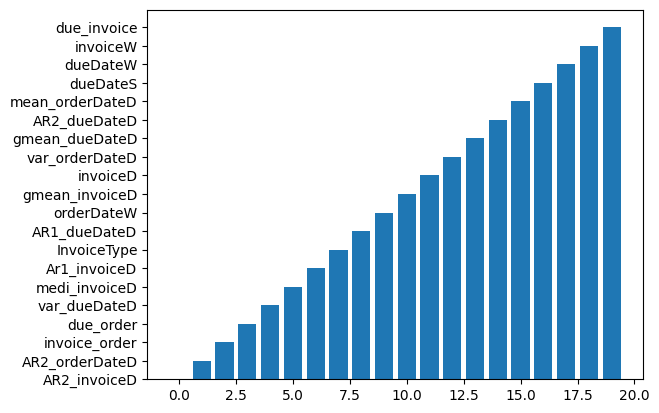

In [75]:
#top 20 features and their feature importance
#!pip install matplotlib

import matplotlib.pyplot as plt

impo=model.feature_importances_
objects = [ 'Region','Amount','Disputed','InvoiceType','orderDateD','orderDateM','orderDateW','orderDateS','invoiceD','invoiceM','invoiceW','invoiceS','dueDateD','dueDateM','dueDateW','dueDateS','dueDateY','due_invoice','due_order','invoice_order','med_orderDateD','mean_orderDateD','gmean_orderDateD','var_orderDateD','std_orderDateD','cov_orderDateD','AR1_orderDateD','AR2_orderDateD','medi_invoiceD','mean_invoiceD','gmean_invoiceD','var_invoiceD','std_invoiceD','cov_invoiceD','Ar1_invoiceD','AR2_invoiceD','medi_dueDateD','mean_dueDateD','gmean_dueDateD','var_dueDateD','std_dueDateD','cov_dueDateD','AR1_dueDateD','AR2_dueDateD']

col = list(zip(objects ,impo ))
kk=np.array(col)
ee=kk[kk[:, 1].argsort()[::-1]]
NEW=(ee[:20])# top 20 features
new=NEW[NEW[:, 1].argsort()]
plt.bar([x for x in range(len(new[:,1]))], new[:,0])
plt.show()



A bank is analysing the data of its customers and the input data is limited to a 7 factors such as Invoice Type, due date, and the geographical region. They are looking for a relation between those factors and delay in the credit card bill payment. 
After preprocessing of the provided data from 1850 customers such as removing missing data, converting categorical data to numerical data, and finally extracting statistical information from the date data. Those 7 factors has been converted to 44 features or factors for analysing. Those data has been divided to two sets, train and test set, then the train set has been fetched to machine learning model (XGBoost). The result of the feature ranking shows that (above graph) the information of due date and invoice date contain more informative information.
Those information can give more confidence to the bank that they can manage the customers who has delay in paying their balance late or help them to remind them.


- **Submit the predictions on the test dataset using your optimized model**

    For each record in the test set (`test.csv`), predict the `Delay` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **UniqueId**
   - **Delay**

In [141]:
# generate sample submission find to use UniqueID column
sample_submission=pd.read_csv('sample_submission.csv')

# generate the true target
Y_true=sample_submission['Delay']

In [150]:
# Find the prediction result
y_pred = model.predict(X_test)

# convert numpy array to Pandas dataframe
Y_pred = pd.DataFrame(y_pred, columns = ['Delay'])

# replace 0 with True based on 'Delay_True' dummy variable and 1 with False one
Y_pred=Y_pred.replace(to_replace=1, value=True)
Y_pred=Y_pred.replace(to_replace=0, value=False)

In [151]:

tn, fp, fn, tp = confusion_matrix(Y_true,Y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  234
False Positives:  71
False Negatives:  239
True Positives:  72


In [152]:

Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:".format(Accuracy))


Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

#Specificity 
Specificity = tn/(tn+fp)
print("Specificity {:0.2f}".format(Specificity))


f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.2f}".format(f1))

Accuracy 49.68%:
Precision 0.50
Recall 0.23
Specificity 0.77
F1 Score 0.32
